In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

obs = pd.read_csv('../Resources/monthly_obs.csv')

gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
gfdl_member_stat = pd.read_csv('../Resources/gfdl_member_stat.csv')

nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')
nasa_member_stat = pd.read_csv('../Resources/nasa_member_stat.csv')

canada_stat = pd.read_csv('../Resources/canada_stat.csv')
canada_member_stat = pd.read_csv('../Resources/canada_member_stat.csv')

canesm_stat = pd.read_csv('../Resources/canesm_stat.csv')
canesm_member_stat = pd.read_csv('../Resources/canesm_member_stat.csv')

nemo_stat = pd.read_csv('../Resources/nemo_stat.csv')
nemo_member_stat = pd.read_csv('../Resources/nemo_member_stat.csv')

cola_stat = pd.read_csv('../Resources/cola_stat.csv')
cola_member_stat = pd.read_csv('../Resources/cola_member_stat.csv')

ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
ncep_member_stat = pd.read_csv('../Resources/ncep_member_stat.csv')


In [3]:
ncep_stat = ncep_stat[['L', 'START', 'TARGET', 'SZN','VAR_SST_NCEP_CFSv2']]
ncep_member_stat_var = ncep_member_stat.groupby(['L', 'START'])['VAR_SST_NCEP_CFSv2'].mean().reset_index()
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
ncep_member_stat_var['TARGET'] = ((ncep_member_stat_var['START'] + ncep_member_stat_var['L']).astype(int))%12
ncep_member_stat_var['TARGET'] = ncep_member_stat_var['TARGET'].apply(lambda x: 12 if x == 0 else x)
ncep_member_stat_var['SZN'] = ncep_member_stat_var['TARGET'].map(month_to_season)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
ncep_member_stat_var_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_member_stat_var[ncep_member_stat_var['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_ncep.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_ncep.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_ncep = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    ncep_member_stat_var_dfs[f'lead{lead}'] = filtered_ncep
    
ncep_member_stat_var_dfs['lead1']

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
ncep_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_stat[ncep_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_ncep.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_ncep.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_ncep = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    ncep_stat_dfs[f'lead{lead}'] = filtered_ncep
    df1 = ncep_member_stat_var_dfs[f'lead{lead}'][['SZN', 'VAR_SST_NCEP_CFSv2']]
    df2 = obs[['SZN', 'VARIANCE3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['VAR_SST_NCEP_CFSv2'] - merged_df['VARIANCE3.4_L3']
    merged_df.rename(columns={'Error': 'VAR_ERR_NCEP_CFSv2'}, inplace=True)
    ncep_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_NCEP_CFSv2'] = merged_df['VAR_ERR_NCEP_CFSv2']

ncep_member_stat_var_dfs['lead1']
#filtered_ncep

,L,START,VAR_SST_NCEP_CFSv2,TARGET,SZN,VAR_ERR_NCEP_CFSv2
0,1.5,1,0.805979,2,JFM,-0.105168
1,1.5,2,0.542134,3,FMA,-0.027850
2,1.5,3,0.416445,4,MAM,0.078013
3,1.5,4,0.330704,5,AMJ,0.073954
4,1.5,5,0.372411,6,MJJ,0.091165
5,1.5,6,0.619614,7,JJA,0.218449
6,1.5,7,0.950240,8,JAS,0.373802
7,1.5,8,1.158378,9,ASO,0.360422
8,1.5,9,1.330474,10,SON,0.272875
9,1.5,10,1.370115,11,OND,0.065908


In [4]:
cola_stat = cola_stat[['L', 'START', 'TARGET', 'SZN','VAR_SST_COLA_CESM1']]
cola_member_stat_var = cola_member_stat.groupby(['L', 'START'])['VAR_SST_COLA_CESM1'].mean().reset_index()
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
cola_member_stat_var['TARGET'] = ((cola_member_stat_var['START'] + cola_member_stat_var['L']).astype(int))%12
cola_member_stat_var['TARGET'] = cola_member_stat_var['TARGET'].apply(lambda x: 12 if x == 0 else x)
cola_member_stat_var['SZN'] = cola_member_stat_var['TARGET'].map(month_to_season)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
cola_member_stat_var_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_cola = cola_member_stat_var[cola_member_stat_var['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_member_stat_var_dfs[f'lead{lead}'] = filtered_cola
    
cola_member_stat_var_dfs['lead1']

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
cola_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_cola = cola_stat[cola_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_stat_dfs[f'lead{lead}'] = filtered_cola
    df1 = cola_member_stat_var_dfs[f'lead{lead}'][['SZN', 'VAR_SST_COLA_CESM1']]
    df2 = obs[['SZN', 'VARIANCE3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['VAR_SST_COLA_CESM1'] - merged_df['VARIANCE3.4_L3']
    merged_df.rename(columns={'Error': 'VAR_ERR_COLA_CESM1'}, inplace=True)
    cola_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_COLA_CESM1'] = merged_df['VAR_ERR_COLA_CESM1']

cola_member_stat_var_dfs['lead1']
#filtered_cola

,L,START,VAR_SST_COLA_CESM1,TARGET,SZN,VAR_ERR_COLA_CESM1
0,1.5,1,0.977900,2,JFM,0.066753
1,1.5,2,0.665144,3,FMA,0.095159
2,1.5,3,0.476414,4,MAM,0.137982
3,1.5,4,0.283165,5,AMJ,0.026415
4,1.5,5,0.506587,6,MJJ,0.225341
5,1.5,6,0.879959,7,JJA,0.478794
6,1.5,7,1.050960,8,JAS,0.474521
7,1.5,8,1.141980,9,ASO,0.344023
8,1.5,9,1.218798,10,SON,0.161199
9,1.5,10,1.244078,11,OND,-0.060128


In [5]:
gfdl_stat = gfdl_stat[['L', 'START', 'TARGET', 'SZN','VAR_SST_GFDL_SPEAR']]
gfdl_stat

,L,START,TARGET,SZN,VAR_SST_GFDL_SPEAR
0,1.5,1,2,JFM,0.600480
1,1.5,2,3,FMA,0.361776
2,1.5,3,4,MAM,0.229501
3,1.5,4,5,AMJ,0.129531
4,1.5,5,6,MJJ,0.185918
...,...,...,...,...,...
115,10.5,8,6,MJJ,0.380271
116,10.5,9,7,JJA,0.395347
117,10.5,10,8,JAS,0.476122
118,10.5,11,9,ASO,0.515503


In [6]:
canesm_stat = canesm_stat[['L', 'START', 'TARGET', 'SZN','VAR_SST_CanESM5']]
canesm_member_stat_var = canesm_member_stat.groupby(['L', 'START'])['VAR_SST_CanESM5'].mean().reset_index()
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canesm_member_stat_var['TARGET'] = ((canesm_member_stat_var['START'] + canesm_member_stat_var['L']).astype(int))%12
canesm_member_stat_var['TARGET'] = canesm_member_stat_var['TARGET'].apply(lambda x: 12 if x == 0 else x)
canesm_member_stat_var['SZN'] = canesm_member_stat_var['TARGET'].map(month_to_season)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
canesm_member_stat_var_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_canesm = canesm_member_stat_var[canesm_member_stat_var['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canesm.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_canesm.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_canesm = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    canesm_member_stat_var_dfs[f'lead{lead}'] = filtered_canesm
    
canesm_member_stat_var_dfs['lead1']

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
canesm_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_canesm = canesm_stat[canesm_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canesm.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_canesm.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_canesm = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    canesm_stat_dfs[f'lead{lead}'] = filtered_canesm
    df1 = canesm_member_stat_var_dfs[f'lead{lead}'][['SZN', 'VAR_SST_CanESM5']]
    df2 = obs[['SZN', 'VARIANCE3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['VAR_SST_CanESM5'] - merged_df['VARIANCE3.4_L3']
    merged_df.rename(columns={'Error': 'VAR_ERR_CanESM5'}, inplace=True)
    canesm_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_CanESM5'] = merged_df['VAR_ERR_CanESM5']

#canesm_member_stat_var_dfs['lead1']
filtered_canesm

,L,START,TARGET,SZN,VAR_SST_CanESM5
0,10.5,4,2,JFM,0.470688
1,10.5,5,3,FMA,0.524449
2,10.5,6,4,MAM,0.438912
3,10.5,7,5,AMJ,0.416180
4,10.5,8,6,MJJ,0.336303
5,10.5,9,7,JJA,0.272850
6,10.5,10,8,JAS,0.220372
7,10.5,11,9,ASO,0.251594
8,10.5,12,10,SON,0.322821
9,10.5,1,11,OND,0.428542


In [7]:
canada_stat = canada_stat[['L', 'START', 'TARGET', 'SZN','VAR_SST_CanSIPS_IC4']]
canada_member_stat_var = canada_member_stat.groupby(['L', 'START'])['VAR_SST_CanSIPS_IC4'].mean().reset_index()
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canada_member_stat_var['TARGET'] = ((canada_member_stat_var['START'] + canada_member_stat_var['L']).astype(int))%12
canada_member_stat_var['TARGET'] = canada_member_stat_var['TARGET'].apply(lambda x: 12 if x == 0 else x)
canada_member_stat_var['SZN'] = canada_member_stat_var['TARGET'].map(month_to_season)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
canada_member_stat_var_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_canada = canada_member_stat_var[canada_member_stat_var['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canada.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_canada.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_canada = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    canada_member_stat_var_dfs[f'lead{lead}'] = filtered_canada
    
canada_member_stat_var_dfs['lead1']

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
canada_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_canada = canada_stat[canada_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canada.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_canada.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_canada = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    canada_stat_dfs[f'lead{lead}'] = filtered_canada
    df1 = canada_member_stat_var_dfs[f'lead{lead}'][['SZN', 'VAR_SST_CanSIPS_IC4']]
    df2 = obs[['SZN', 'VARIANCE3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['VAR_SST_CanSIPS_IC4'] - merged_df['VARIANCE3.4_L3']
    merged_df.rename(columns={'Error': 'VAR_ERR_CanSIPS_IC4'}, inplace=True)
    canada_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_CanSIPS_IC4'] = merged_df['VAR_ERR_CanSIPS_IC4']

canada_member_stat_var_dfs['lead1']


,L,START,VAR_SST_CanSIPS_IC4,TARGET,SZN,VAR_ERR_CanSIPS_IC4
0,1.5,1,1.110209,2,JFM,0.199063
1,1.5,2,0.781024,3,FMA,0.211039
2,1.5,3,0.506803,4,MAM,0.168371
3,1.5,4,0.343562,5,AMJ,0.086812
4,1.5,5,0.411945,6,MJJ,0.130700
5,1.5,6,0.569909,7,JJA,0.168744
6,1.5,7,0.716595,8,JAS,0.140157
7,1.5,8,0.894219,9,ASO,0.096263
8,1.5,9,1.187629,10,SON,0.130030
9,1.5,10,1.525122,11,OND,0.220916


In [8]:
nemo_stat = nemo_stat[['L', 'START', 'TARGET', 'SZN','VAR_SST_GEM52_NEMO']]
nemo_member_stat_var = nemo_member_stat.groupby(['L', 'START'])['VAR_SST_GEM52_NEMO'].mean().reset_index()
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nemo_member_stat_var['TARGET'] = ((nemo_member_stat_var['START'] + nemo_member_stat_var['L']).astype(int))%12
nemo_member_stat_var['TARGET'] = nemo_member_stat_var['TARGET'].apply(lambda x: 12 if x == 0 else x)
nemo_member_stat_var['SZN'] = nemo_member_stat_var['TARGET'].map(month_to_season)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nemo_member_stat_var_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nemo = nemo_member_stat_var[nemo_member_stat_var['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nemo.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nemo.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nemo = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nemo_member_stat_var_dfs[f'lead{lead}'] = filtered_nemo
    
nemo_member_stat_var_dfs['lead1']

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nemo_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nemo = nemo_stat[nemo_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nemo.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nemo.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nemo = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nemo_stat_dfs[f'lead{lead}'] = filtered_nemo
    df1 = nemo_member_stat_var_dfs[f'lead{lead}'][['SZN', 'VAR_SST_GEM52_NEMO']]
    df2 = obs[['SZN', 'VARIANCE3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['VAR_SST_GEM52_NEMO'] - merged_df['VARIANCE3.4_L3']
    merged_df.rename(columns={'Error': 'VAR_ERR_GEM52_NEMO'}, inplace=True)
    nemo_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_GEM52_NEMO'] = merged_df['VAR_ERR_GEM52_NEMO']
    
#nemo_stat_dfs['lead1']
nemo_member_stat_var_dfs['lead1']

,L,START,VAR_SST_GEM52_NEMO,TARGET,SZN,VAR_ERR_GEM52_NEMO
0,1.5,1,1.349184,2,JFM,0.438037
1,1.5,2,1.024146,3,FMA,0.454162
2,1.5,3,0.698483,4,MAM,0.360051
3,1.5,4,0.447896,5,AMJ,0.191146
4,1.5,5,0.611840,6,MJJ,0.330595
5,1.5,6,0.872674,7,JJA,0.471509
6,1.5,7,1.076379,8,JAS,0.499940
7,1.5,8,1.300054,9,ASO,0.502097
8,1.5,9,1.599573,10,SON,0.541974
9,1.5,10,1.967989,11,OND,0.663782


In [9]:
nasa_stat = nasa_stat[['L', 'START', 'TARGET', 'SZN','VAR_SST_NASA_GEOSS2S']]
nasa_member_stat_var = nasa_member_stat.groupby(['L', 'START'])['VAR_SST_NASA_GEOSS2S'].mean().reset_index()
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nasa_member_stat_var['TARGET'] = ((nasa_member_stat_var['START'] + nasa_member_stat_var['L']).astype(int))%12
nasa_member_stat_var['TARGET'] = nasa_member_stat_var['TARGET'].apply(lambda x: 12 if x == 0 else x)
nasa_member_stat_var['SZN'] = nasa_member_stat_var['TARGET'].map(month_to_season)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nasa_member_stat_var_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nasa = nasa_member_stat_var[nasa_member_stat_var['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nasa.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nasa.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nasa = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nasa_member_stat_var_dfs[f'lead{lead}'] = filtered_nasa
    
nasa_member_stat_var_dfs['lead1']

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nasa_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nasa = nasa_stat[nasa_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nasa.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nasa.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nasa = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nasa_stat_dfs[f'lead{lead}'] = filtered_nasa
    df1 = nasa_member_stat_var_dfs[f'lead{lead}'][['SZN', 'VAR_SST_NASA_GEOSS2S']]
    df2 = obs[['SZN', 'VARIANCE3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['VAR_SST_NASA_GEOSS2S'] - merged_df['VARIANCE3.4_L3']
    merged_df.rename(columns={'Error': 'VAR_ERR_NASA_GEOSS2S'}, inplace=True)
    nasa_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_NASA_GEOSS2S'] = merged_df['VAR_ERR_NASA_GEOSS2S']
    
nasa_stat_dfs['lead7']

,L,START,TARGET,SZN,VAR_SST_NASA_GEOSS2S
0,7.5,7,2,JFM,3.312110
1,7.5,8,3,FMA,2.660764
2,7.5,9,4,MAM,1.647455
3,7.5,10,5,AMJ,1.497271
4,7.5,11,6,MJJ,1.050840
5,7.5,12,7,JJA,0.961526
6,7.5,1,8,JAS,0.988125
7,7.5,2,9,ASO,1.284540
8,7.5,3,10,SON,2.376893
9,7.5,4,11,OND,3.129914


In [10]:
gfdl_member_stat

,M,L,START,TARGET,SZN,MEAN_SST_GFDL_SPEAR,VAR_SST_GFDL_SPEAR
0,1,1.5,1,2,JFM,26.738680,0.697007
1,2,1.5,1,2,JFM,26.732249,0.576535
2,3,1.5,1,2,JFM,26.746541,0.603709
3,4,1.5,1,2,JFM,26.735400,0.640981
4,5,1.5,1,2,JFM,26.756399,0.565600
...,...,...,...,...,...,...,...
1795,11,10.5,12,10,SON,25.887765,0.453927
1796,12,10.5,12,10,SON,25.847967,0.662877
1797,13,10.5,12,10,SON,25.936973,0.947368
1798,14,10.5,12,10,SON,25.883585,0.598587


In [11]:
gfdl_member_stat_var = gfdl_member_stat.groupby(['L', 'START'])['VAR_SST_GFDL_SPEAR'].mean().reset_index()
gfdl_member_stat_var

,L,START,VAR_SST_GFDL_SPEAR
0,1.5,1,0.600480
1,1.5,2,0.361776
2,1.5,3,0.229501
3,1.5,4,0.129531
4,1.5,5,0.185918
...,...,...,...
115,10.5,8,0.380271
116,10.5,9,0.395347
117,10.5,10,0.476122
118,10.5,11,0.515503


In [12]:
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
gfdl_member_stat_var['TARGET'] = ((gfdl_member_stat_var['START'] + gfdl_member_stat_var['L']).astype(int))%12
gfdl_member_stat_var['TARGET'] = gfdl_member_stat_var['TARGET'].apply(lambda x: 12 if x == 0 else x)
gfdl_member_stat_var['SZN'] = gfdl_member_stat_var['TARGET'].map(month_to_season)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
gfdl_member_stat_var_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_member_stat_var[gfdl_member_stat_var['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_member_stat_var_dfs[f'lead{lead}'] = filtered_gfdl

    df1 = gfdl_member_stat_var_dfs[f'lead{lead}'][['SZN', 'VAR_SST_GFDL_SPEAR']]
    df2 = obs[['SZN', 'VARIANCE3.4_L3']]
    merged_df = pd.merge(df1, df2, on='SZN', how='inner')
    merged_df['Error'] = merged_df['VAR_SST_GFDL_SPEAR'] - merged_df['VARIANCE3.4_L3']
    merged_df.rename(columns={'Error': 'VAR_ERR_GFDL_SPEAR'}, inplace=True)
    gfdl_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_GFDL_SPEAR'] = merged_df['VAR_ERR_GFDL_SPEAR']

gfdl_member_stat_var_dfs['lead10']

,L,START,VAR_SST_GFDL_SPEAR,TARGET,SZN,VAR_ERR_GFDL_SPEAR
0,10.5,4,0.874057,2,JFM,-0.037089
1,10.5,5,0.761027,3,FMA,0.191043
2,10.5,6,0.583629,4,MAM,0.245197
3,10.5,7,0.454349,5,AMJ,0.197599
4,10.5,8,0.380271,6,MJJ,0.099025
5,10.5,9,0.395347,7,JJA,-0.005818
6,10.5,10,0.476122,8,JAS,-0.100317
7,10.5,11,0.515503,9,ASO,-0.282454
8,10.5,12,0.594260,10,SON,-0.463339
9,10.5,1,0.849388,11,OND,-0.454818


In [13]:

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
gfdl_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl
    
gfdl_stat_dfs['lead1']

,L,START,TARGET,SZN,VAR_SST_GFDL_SPEAR
0,1.5,1,2,JFM,0.600480
1,1.5,2,3,FMA,0.361776
2,1.5,3,4,MAM,0.229501
3,1.5,4,5,AMJ,0.129531
4,1.5,5,6,MJJ,0.185918
5,1.5,6,7,JJA,0.341749
6,1.5,7,8,JAS,0.530060
7,1.5,8,9,ASO,0.674698
8,1.5,9,10,SON,0.827131
9,1.5,10,11,OND,0.990047


In [14]:

def multimodel_nino3_4_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    plt.plot(nasa_member_stat_var_dfs[f'lead{lead}']['SZN'], nasa_member_stat_var_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S'], marker='o', markersize=6, linewidth=3, linestyle='--', color='mediumseagreen' ,label = 'NASA Members')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S'], marker='o', markersize=6, linewidth=3, linestyle='-', color='mediumseagreen', label = 'NASA GEOSS2S')
    
    plt.plot(gfdl_member_stat_var_dfs[f'lead{lead}']['SZN'], gfdl_member_stat_var_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='--', color='red' ,label = 'GFDl Members')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')

    plt.plot(ncep_member_stat_var_dfs[f'lead{lead}']['SZN'], ncep_member_stat_var_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='--', color='steelblue' ,label = 'NCEP_CFSv2')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue', label='NCEP-CFSv2')

    plt.plot(cola_member_stat_var_dfs[f'lead{lead}']['SZN'], cola_member_stat_var_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='--', color='#FBBC05', label='COLA_CESM1 Members')
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05', label='COLA_CESM1')

    #plt.plot(obs['SZN'], obs[f'NINO_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Variance NINO SST: Ensemble mean vs Mean of members at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('Variance', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=4)
    plt.savefig(f'../Plots/internal/varianceDiffModels.png', format='png')
    # Show the plot
    plt.show()

#multimodel_nino3_4_visualizer(5)



In [15]:
def multimodel_nino3_4_canadian_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(canada_member_stat_var_dfs[f'lead{lead}']['SZN'], canada_member_stat_var_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC4'], marker='o', markersize=6, linewidth=3, linestyle='--', color='#9B51E0' ,label = 'CanSIPS Members')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC4'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#9B51E0', label = 'CanSIPS-IC4')

    plt.plot(canesm_member_stat_var_dfs[f'lead{lead}']['SZN'], canesm_member_stat_var_dfs[f'lead{lead}']['VAR_SST_CanESM5'], marker='o', markersize=6, linewidth=3, linestyle='--', color='thistle', label='CanESM5 Members')
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['VAR_SST_CanESM5'], marker='o', markersize=6, linewidth=3, linestyle='-', color='thistle', label='CanESM5')

    plt.plot(nemo_member_stat_var_dfs[f'lead{lead}']['SZN'], nemo_member_stat_var_dfs[f'lead{lead}']['VAR_SST_GEM52_NEMO'], marker='o', markersize=6, linewidth=3, linestyle='--', color='plum' ,label = 'GEM5.2 NEMO Members')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['VAR_SST_GEM52_NEMO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='plum', label = 'GEM5.2 NEMO')

    #plt.plot(obs['SZN'], obs[f'NINO_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Variance NINO SST: Ensemble mean vs Mean of members at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('Variance', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=2)
    plt.savefig(f'../Plots/internal/varianceDiffCanada.png', format='png')
    # Show the plot
    plt.show()

#multimodel_nino3_4_canadian_visualizer(5)

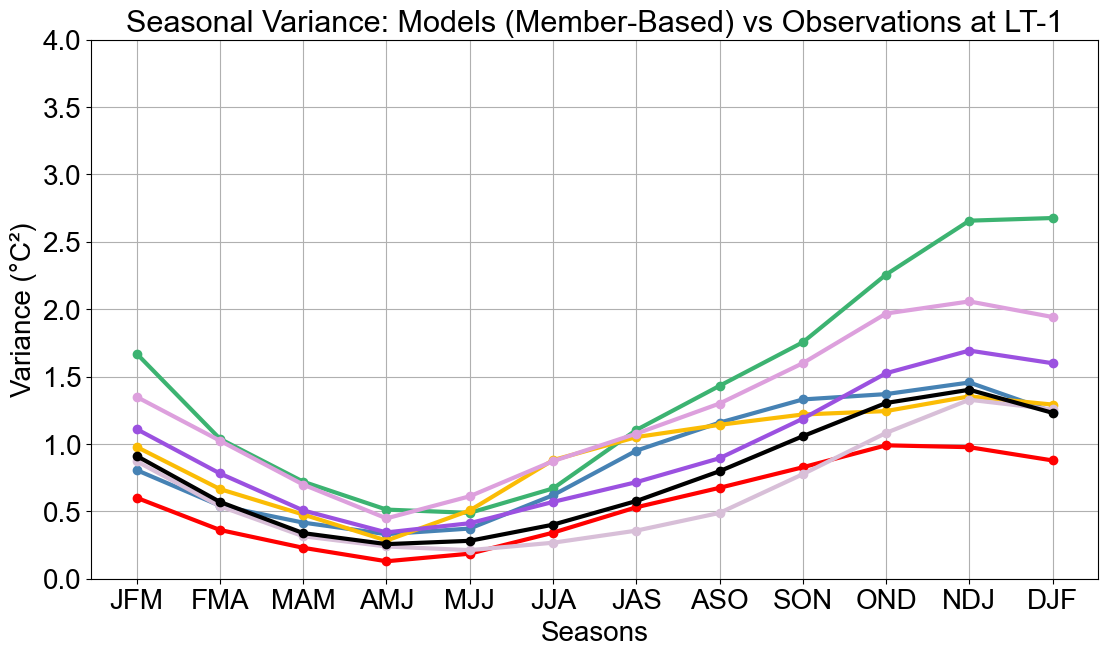

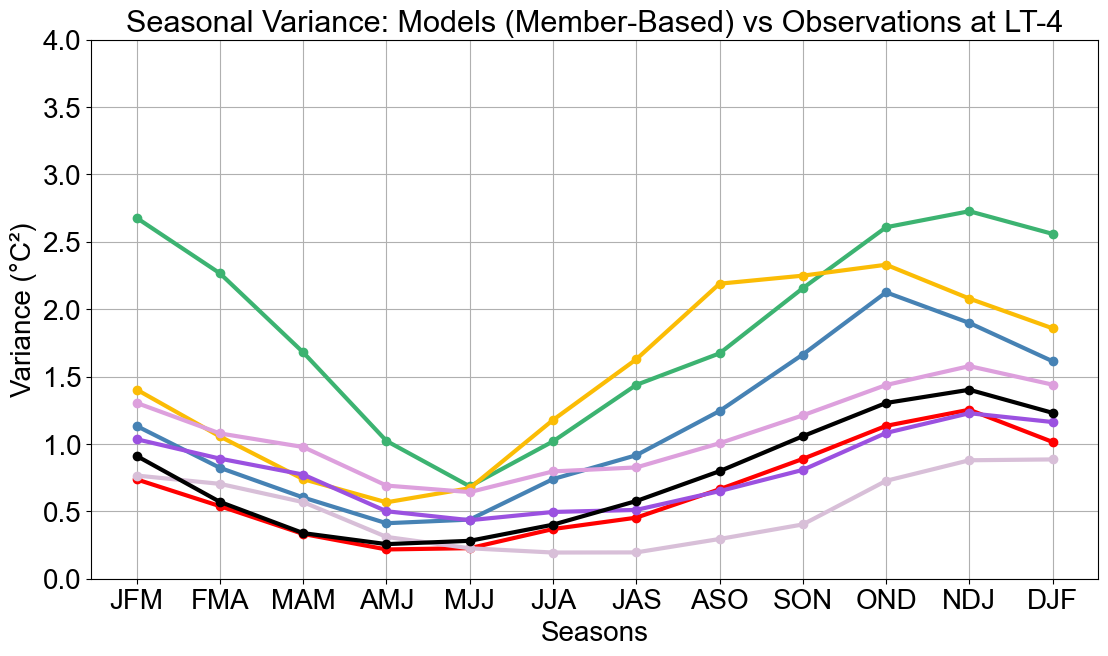

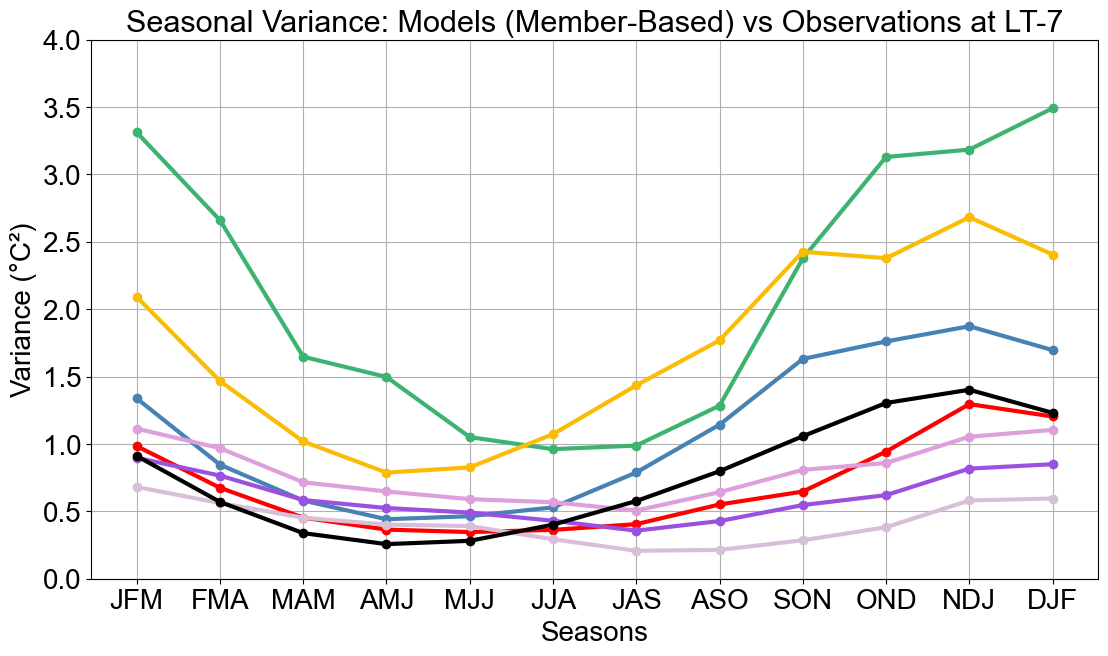

In [16]:
def member_based_variance_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    plt.plot(nasa_member_stat_var_dfs[f'lead{lead}']['SZN'], nasa_member_stat_var_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S'], marker='o', markersize=6, linewidth=3, linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(gfdl_member_stat_var_dfs[f'lead{lead}']['SZN'], gfdl_member_stat_var_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red' ,label = 'GFDl-SPEAR')
    plt.plot(ncep_member_stat_var_dfs[f'lead{lead}']['SZN'], ncep_member_stat_var_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFS2')
    plt.plot(cola_member_stat_var_dfs[f'lead{lead}']['SZN'], cola_member_stat_var_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05', label='COLA-CESM1')
    plt.plot(canada_member_stat_var_dfs[f'lead{lead}']['SZN'], canada_member_stat_var_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC4'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(canesm_member_stat_var_dfs[f'lead{lead}']['SZN'], canesm_member_stat_var_dfs[f'lead{lead}']['VAR_SST_CanESM5'], marker='o', markersize=6, linewidth=3, linestyle='-', color='thistle', label='CanESM5')
    plt.plot(nemo_member_stat_var_dfs[f'lead{lead}']['SZN'], nemo_member_stat_var_dfs[f'lead{lead}']['VAR_SST_GEM52_NEMO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    
    plt.plot(obs['SZN'], obs[f'VARIANCE3.4_L3'], marker='o',markersize=6, linewidth=3, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Variance: Models (Member-Based) vs Observations at LT-{lead}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('Variance (°C²)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=4)
    plt.savefig(f'../Plots/MEMVAR/seasonal_var_lead{lead-0.5}.svg', format='svg')
    # Show the plot
    plt.show()

leads = {7,4, 1}
for lead in leads:
    member_based_variance_visualizer(lead)


In [17]:
df1 = gfdl_member_stat_var_dfs['lead1'][['SZN', 'VAR_SST_GFDL_SPEAR']]
df2 = obs[['SZN', 'VARIANCE3.4_L3']]
merged_df = pd.merge(df1, df2, on='SZN', how='inner')
merged_df['Error'] = merged_df['VAR_SST_GFDL_SPEAR'] - merged_df['VARIANCE3.4_L3']
merged_df.rename(columns={'Error': 'VAR_ERR_GFDL_SPEAR'}, inplace=True)
gfdl_member_stat_var_dfs['lead1']['VAR_ERR_GFDL_SPEAR'] = merged_df['VAR_ERR_GFDL_SPEAR']
# View the result
gfdl_member_stat_var_dfs['lead1']

,L,START,VAR_SST_GFDL_SPEAR,TARGET,SZN,VAR_ERR_GFDL_SPEAR
0,1.5,1,0.600480,2,JFM,-0.310666
1,1.5,2,0.361776,3,FMA,-0.208209
2,1.5,3,0.229501,4,MAM,-0.108931
3,1.5,4,0.129531,5,AMJ,-0.127219
4,1.5,5,0.185918,6,MJJ,-0.095327
5,1.5,6,0.341749,7,JJA,-0.059416
6,1.5,7,0.530060,8,JAS,-0.046379
7,1.5,8,0.674698,9,ASO,-0.123259
8,1.5,9,0.827131,10,SON,-0.230468
9,1.5,10,0.990047,11,OND,-0.314160


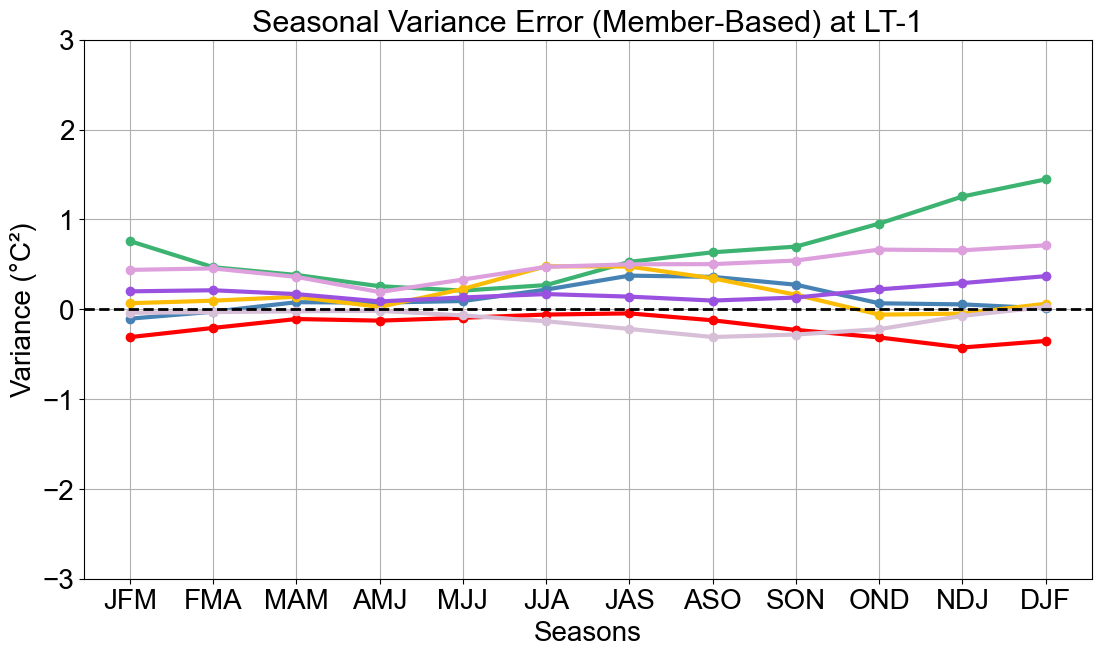

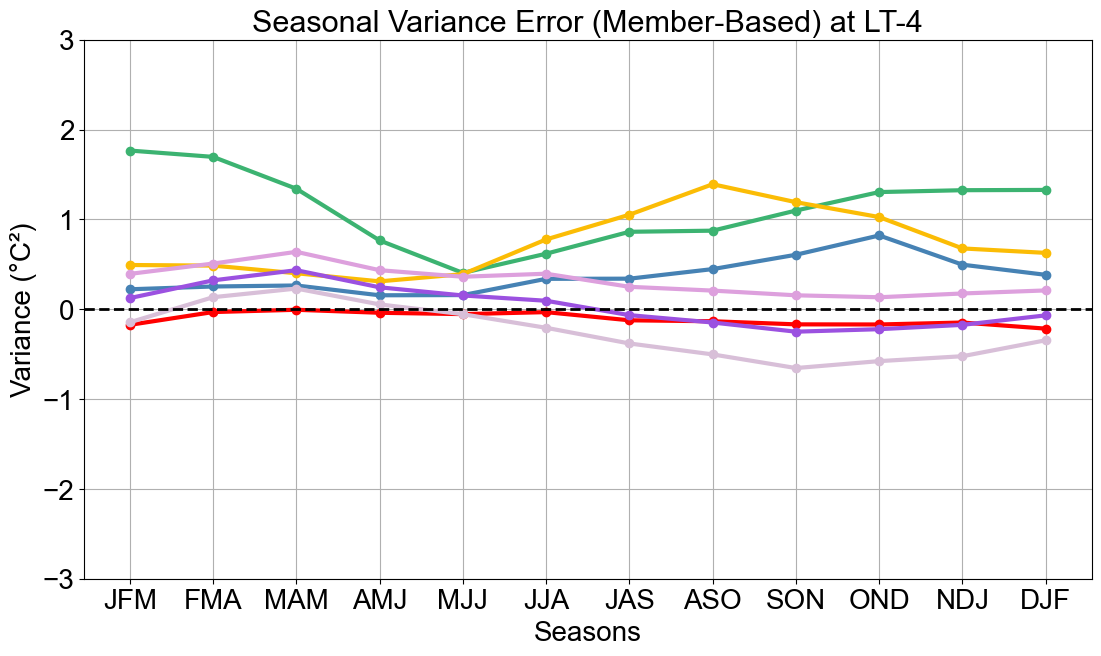

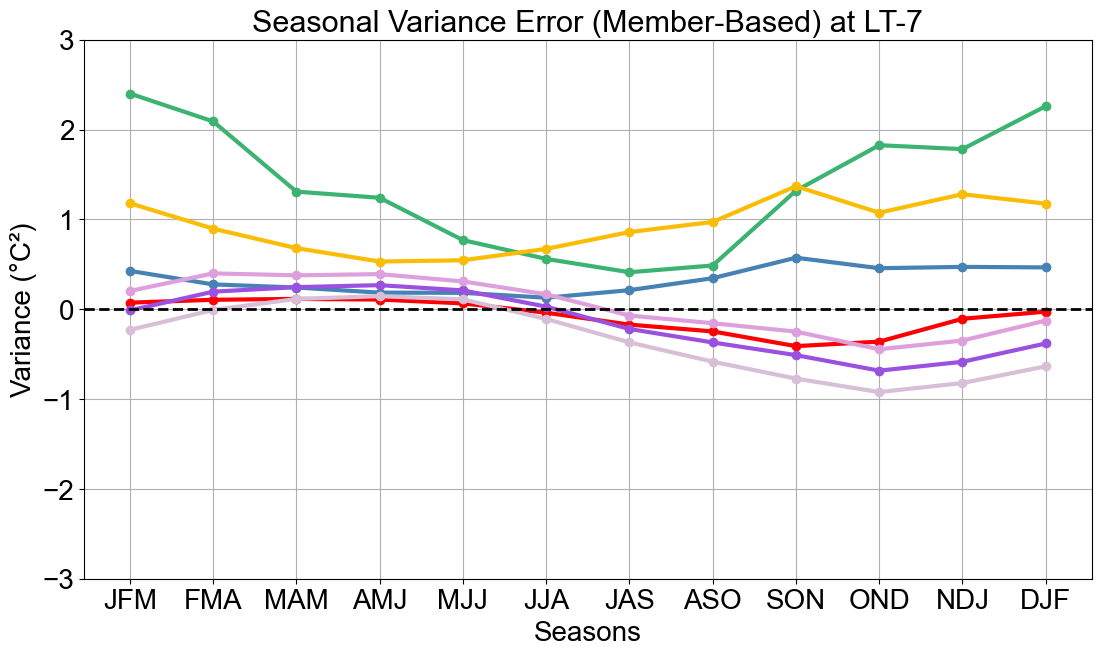

In [18]:
def member_based_variance_err_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    plt.plot(nasa_member_stat_var_dfs[f'lead{lead}']['SZN'], nasa_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_NASA_GEOSS2S'], marker='o', markersize=6, linewidth=3, linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(gfdl_member_stat_var_dfs[f'lead{lead}']['SZN'], gfdl_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red' ,label = 'GFDl-SPEAR')
    plt.plot(ncep_member_stat_var_dfs[f'lead{lead}']['SZN'], ncep_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFS2')
    plt.plot(cola_member_stat_var_dfs[f'lead{lead}']['SZN'], cola_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05', label='COLA-CESM1')
    plt.plot(canada_member_stat_var_dfs[f'lead{lead}']['SZN'], canada_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_CanSIPS_IC4'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(canesm_member_stat_var_dfs[f'lead{lead}']['SZN'], canesm_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_CanESM5'], marker='o', markersize=6, linewidth=3, linestyle='-', color='thistle', label='CanESM5')
    plt.plot(nemo_member_stat_var_dfs[f'lead{lead}']['SZN'], nemo_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_GEM52_NEMO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    
    #plt.plot(obs['SZN'], obs[f'VARIANCE3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Variance Error (Member-Based) at LT-{lead}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('Variance (°C²)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=-3, ymax=3)
    plt.axhline(y=0, color='black', linewidth=2, linestyle = "--")
    plt.savefig(f'../Plots/MEMVAR/seasonal_var_err_lead{lead-0.5}.svg', format='svg')
    # Show the plot
    plt.show()

leads = {7,4, 1}
for lead in leads:
    member_based_variance_err_visualizer(lead)

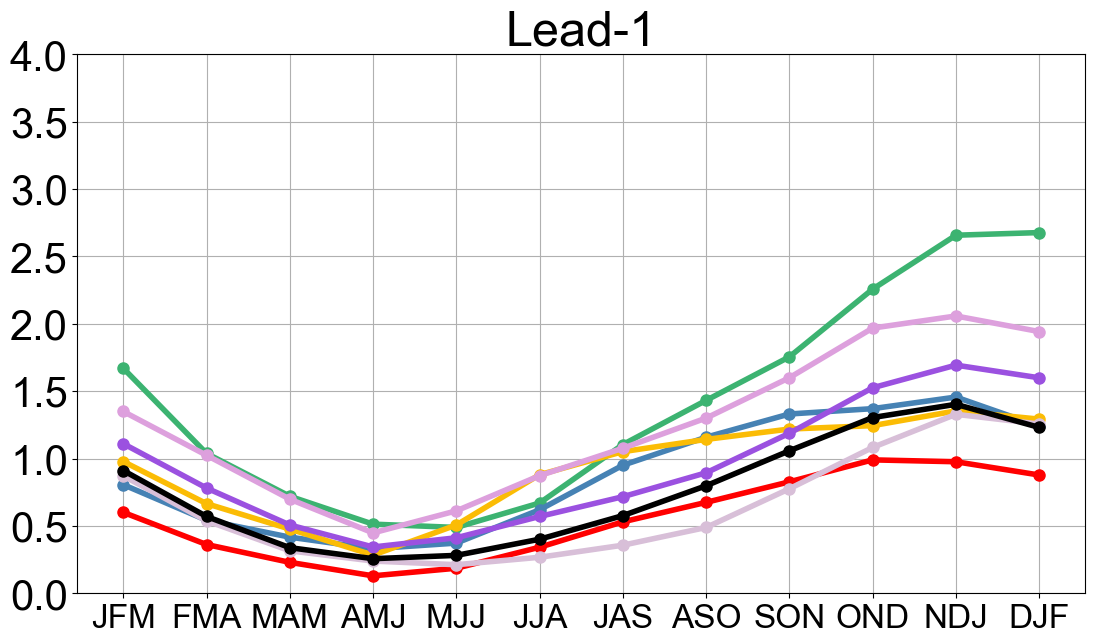

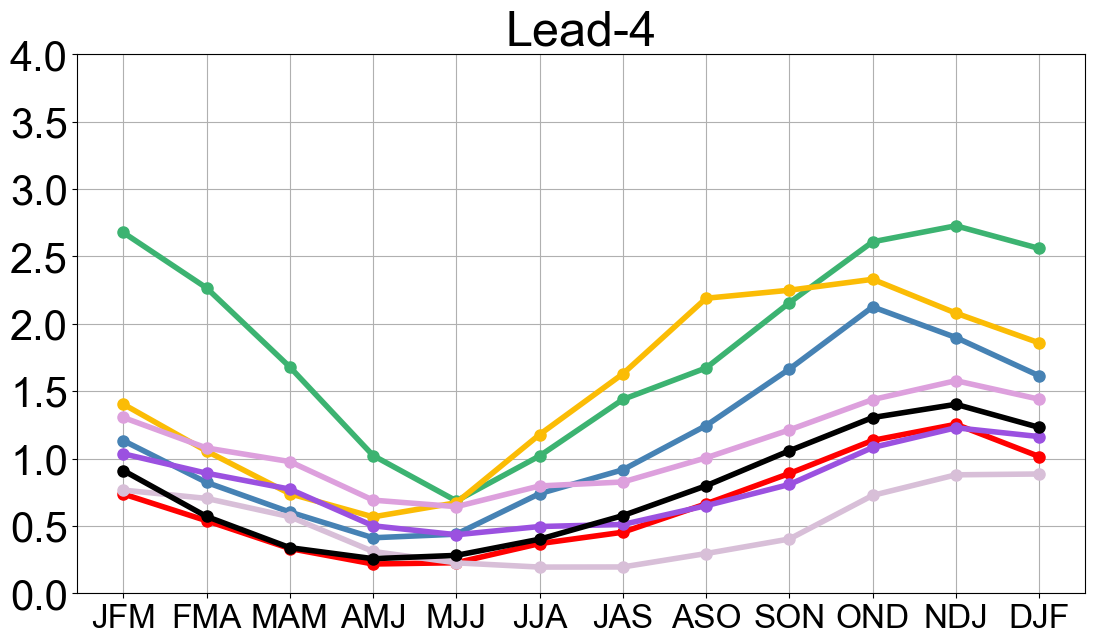

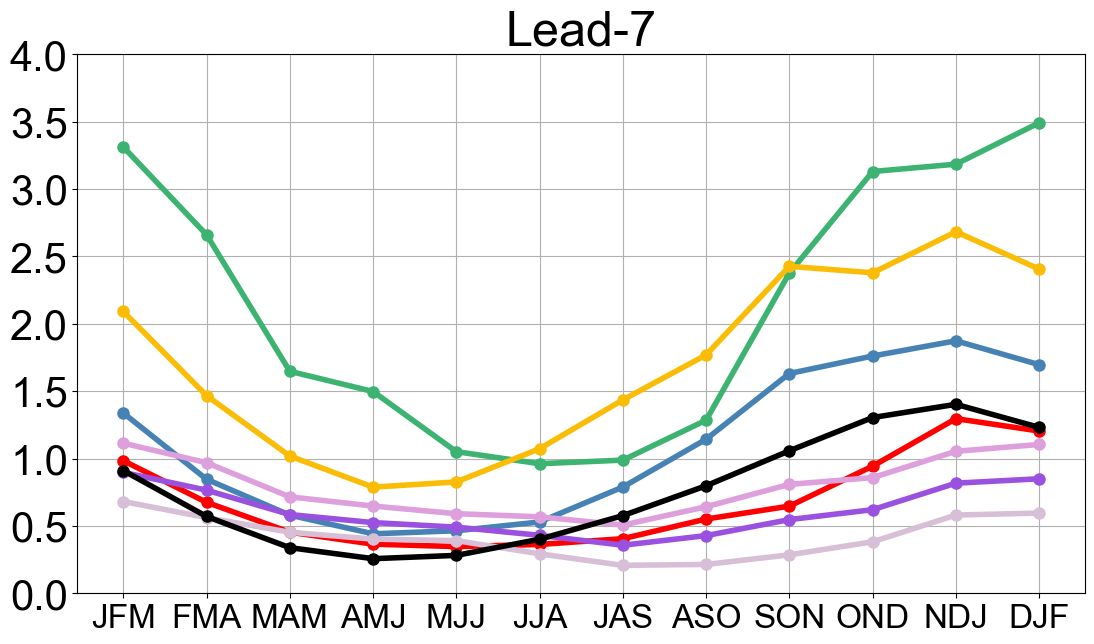

In [23]:
def PT_member_based_variance_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    plt.plot(nasa_member_stat_var_dfs[f'lead{lead}']['SZN'], nasa_member_stat_var_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S'], marker='o', markersize=8, linewidth=4, linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(gfdl_member_stat_var_dfs[f'lead{lead}']['SZN'], gfdl_member_stat_var_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR'], marker='o', markersize=8, linewidth=4, linestyle='-', color='red' ,label = 'GFDl-SPEAR')
    plt.plot(ncep_member_stat_var_dfs[f'lead{lead}']['SZN'], ncep_member_stat_var_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2'], marker='o', markersize=8, linewidth=4, linestyle='-', color='steelblue' ,label = 'NCEP-CFS2')
    plt.plot(cola_member_stat_var_dfs[f'lead{lead}']['SZN'], cola_member_stat_var_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1'], marker='o', markersize=8, linewidth=4, linestyle='-', color='#FBBC05', label='COLA-CESM1')
    plt.plot(canada_member_stat_var_dfs[f'lead{lead}']['SZN'], canada_member_stat_var_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC4'], marker='o', markersize=8, linewidth=4, linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(canesm_member_stat_var_dfs[f'lead{lead}']['SZN'], canesm_member_stat_var_dfs[f'lead{lead}']['VAR_SST_CanESM5'], marker='o', markersize=8, linewidth=4, linestyle='-', color='thistle', label='CanESM5')
    plt.plot(nemo_member_stat_var_dfs[f'lead{lead}']['SZN'], nemo_member_stat_var_dfs[f'lead{lead}']['VAR_SST_GEM52_NEMO'], marker='o', markersize=8, linewidth=4, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    
    plt.plot(obs['SZN'], obs[f'VARIANCE3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Lead-{lead}',size = 35)
    #plt.xlabel('Seasons', size = 20)
    #plt.ylabel('Variance (°C²)', size = 20)
    plt.xticks(size = 24)
    plt.yticks(size = 30)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=4)
    plt.savefig(f'../Plots/MEMVAR/PT_seasonal_var_lead{lead-0.5}.svg', format='svg')
    # Show the plot
    plt.show()

leads = {7,4, 1}
for lead in leads:
    PT_member_based_variance_visualizer(lead)


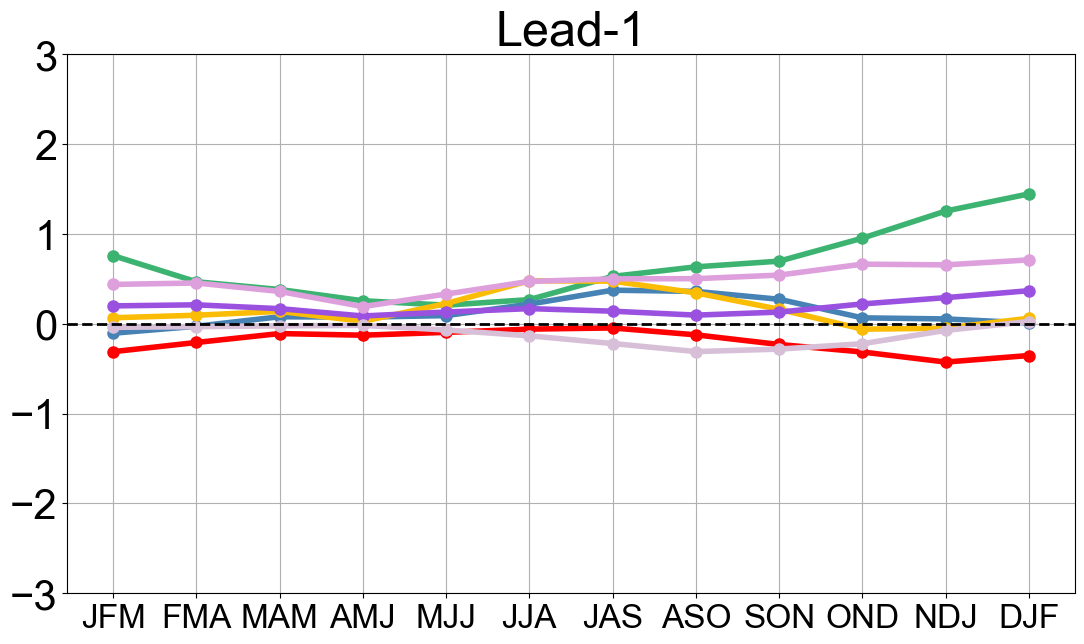

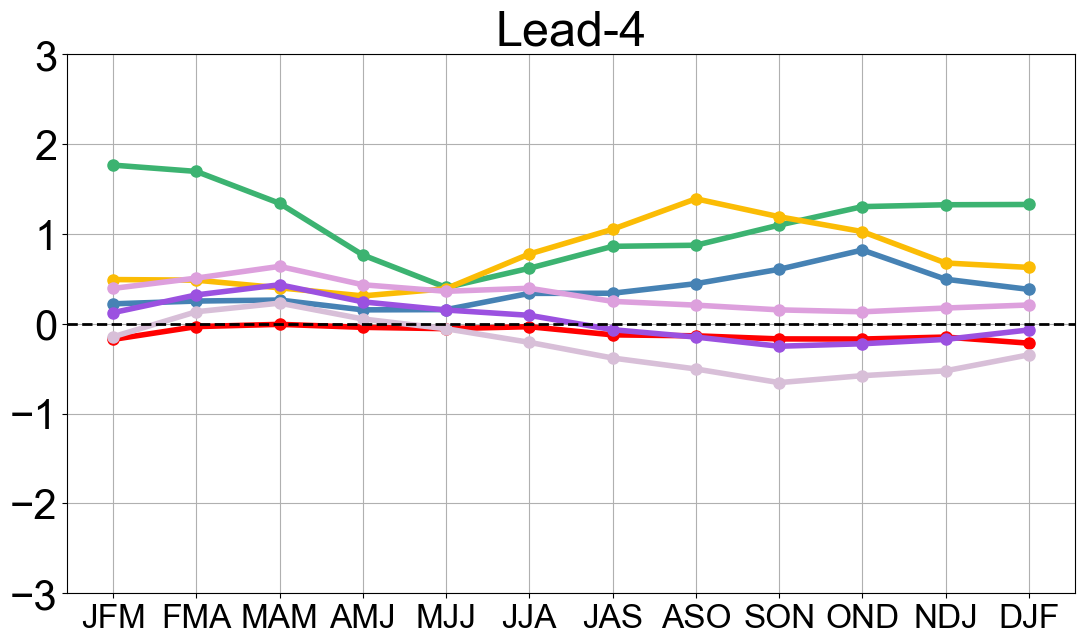

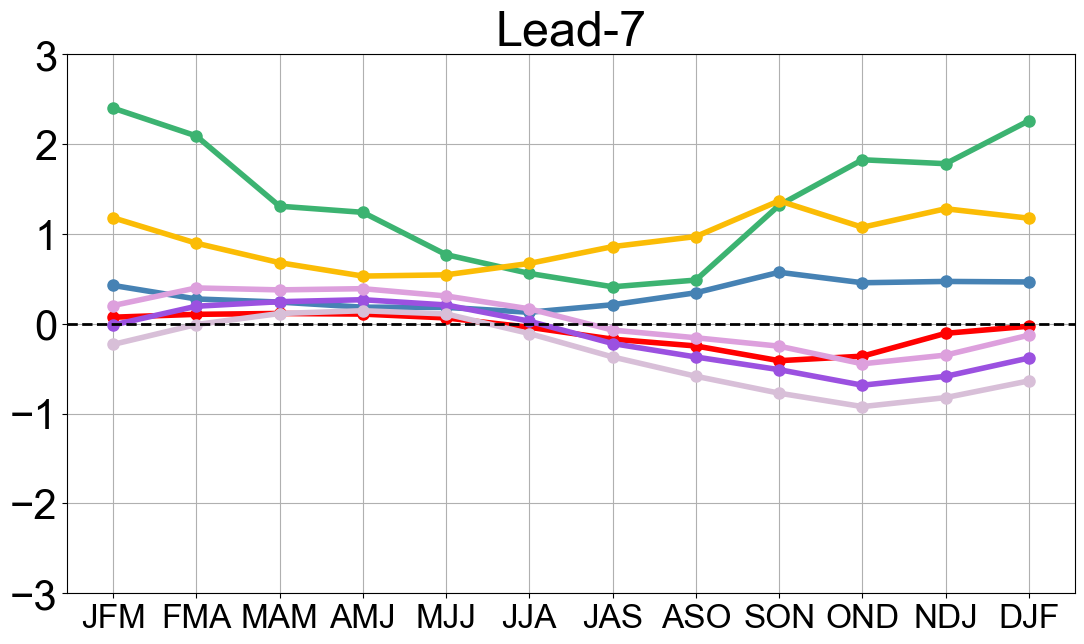

In [22]:
def PT_member_based_variance_err_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    plt.plot(nasa_member_stat_var_dfs[f'lead{lead}']['SZN'], nasa_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_NASA_GEOSS2S'], marker='o', markersize=8, linewidth=4, linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(gfdl_member_stat_var_dfs[f'lead{lead}']['SZN'], gfdl_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_GFDL_SPEAR'], marker='o', markersize=8, linewidth=4, linestyle='-', color='red' ,label = 'GFDl-SPEAR')
    plt.plot(ncep_member_stat_var_dfs[f'lead{lead}']['SZN'], ncep_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_NCEP_CFSv2'], marker='o', markersize=8, linewidth=4, linestyle='-', color='steelblue' ,label = 'NCEP-CFS2')
    plt.plot(cola_member_stat_var_dfs[f'lead{lead}']['SZN'], cola_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_COLA_CESM1'], marker='o', markersize=8, linewidth=4, linestyle='-', color='#FBBC05', label='COLA-CESM1')
    plt.plot(canada_member_stat_var_dfs[f'lead{lead}']['SZN'], canada_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_CanSIPS_IC4'], marker='o', markersize=8, linewidth=4, linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(canesm_member_stat_var_dfs[f'lead{lead}']['SZN'], canesm_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_CanESM5'], marker='o', markersize=8, linewidth=4, linestyle='-', color='thistle', label='CanESM5')
    plt.plot(nemo_member_stat_var_dfs[f'lead{lead}']['SZN'], nemo_member_stat_var_dfs[f'lead{lead}']['VAR_ERR_GEM52_NEMO'], marker='o', markersize=8, linewidth=4, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    
    #plt.plot(obs['SZN'], obs[f'VARIANCE3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Lead-{lead}',size = 35)
    #plt.xlabel('Seasons', size = 20)
    #plt.ylabel('Variance (°C²)', size = 20)
    plt.xticks(size = 24)
    plt.yticks(size = 30)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=-3, ymax=3)
    plt.axhline(y=0, color='black', linewidth=2, linestyle = "--")
    plt.savefig(f'../Plots/MEMVAR/PT_seasonal_var_err_lead{lead-0.5}.svg', format='svg')
    # Show the plot
    plt.show()

leads = {7,4, 1}
for lead in leads:
    PT_member_based_variance_err_visualizer(lead)